In [15]:
# For data manupulations
import pandas as pd 
import numpy as np

# For data visualozation
import matplotlib.pyplot as plt
import seaborn as sns

# For interactivity

from ipywidgets import interact
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv("Crop.csv")


In [17]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [18]:
df.shape

(2200, 8)

In [19]:
df.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [20]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [21]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

# Agricultural product optimization Engine summary for all the crop

In [22]:
print("Average Ratio of Nitrogen in the soil: {0:.2f}".format(df["N"].mean()))
print("Average Ratio of potasium in the soil: {0:.2f}".format(df["K"].mean()))
print("Average Ratio of Phosphorous in the soil: {0:.2f}".format(df["P"].mean()))
print("Average Ratio of Ph in the soil: {0:.2f}".format(df["ph"].mean()))
print("Average Ratio of Temperature in the soil: {0:.2f}".format(df["temperature"].mean()))
print("Average Ratio of Rainfall in the soil: {0:.2f}".format(df["rainfall"].mean()))
print("Average Ratio of Humidity in the soil: {0:.2f}".format(df["humidity"].mean()))

Average Ratio of Nitrogen in the soil: 50.55
Average Ratio of potasium in the soil: 48.15
Average Ratio of Phosphorous in the soil: 53.36
Average Ratio of Ph in the soil: 6.47
Average Ratio of Temperature in the soil: 25.62
Average Ratio of Rainfall in the soil: 103.46
Average Ratio of Humidity in the soil: 71.48


In [23]:
# Description of some statistics
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


df.groupby(['label']).mean()

In [24]:
# let's check the summary statistics of each crop
@interact

def summary(Crops=list(df["label"].value_counts().index)):
    x=df[df["label"]==Crops]
    print("-------------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen Required :",x["N"].min())
    print("Average NItgrogen Reqiured :",x["N"].mean())
    print("Maximum Nitrogen Required :",x["N"].max())

    print("-------------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous Required :",x["P"].min())
    print("Average Phosphorous Reqiured :",x["P"].mean())
    print("Maximum Phosphorous Required :",x["P"].max())

    print("-------------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium Required :",x["K"].min())
    print("Average Potassium Reqiured :",x["K"].mean())
    print("Maximum Potassium Required :",x["K"].max())

    print("-------------------------------------------------")
    print("Statistics for Ph")
    print("Minimum Ph Required :",x["ph"].min())
    print("Average Ph Reqiured :",x["ph"].mean())
    print("Maximum Ph Required :",x["ph"].max())
    
    print("-------------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature Required :",x["temperature"].min())
    print("Average Temperature Reqiured :",x["temperature"].mean())
    print("Maximum Temperature Required :",x["temperature"].max())

    print("-------------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall Required :",x["rainfall"].min())
    print("Average Rainfall Reqiured :",x["rainfall"].mean())
    print("Maximum Rainfall Required :",x["rainfall"].max())

    print("-------------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity Required :",x["humidity"].min())
    print("Average Humidity Reqiured :",x["humidity"].mean())
    print("Maximum Humidity Required :",x["humidity"].max())

interactive(children=(Dropdown(description='Crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [25]:
@interact
def summary(conditions=['N','P','K','temperature','humidity','ph','rainfall']):
    print(df.groupby(['label']).agg({conditions :  ['mean','max','min']}))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [26]:
@interact
def summary(conditions=['N','P','K','temperature','humidity','ph','rainfall']):
    print(df.groupby(['label']).agg({conditions :  ['mean','max','min']}))@interact
def summary(conditions=['N','P','K','temperature','humidity','ph','rainfall']):
    print(df.groupby(['label']).agg({conditions :  ['mean','max','min']}))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [27]:
print("Summer Crop")
print("**********************************************************************")
print(df[(df['temperature']>30)&(df['humidity']>50)]['label'].unique())
print("winter Crop")
print("**********************************************************************")
print(df[(df['temperature']<20)&(df['humidity']>30)]['label'].unique())
print('rainy Crop')
print("***********************************************************************")
print(df[(df['rainfall']>200)&(df['humidity']<30)]['label'].unique())

Summer Crop
**********************************************************************
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
winter Crop
**********************************************************************
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
rainy Crop
***********************************************************************
[]


# How to Ploting a chat
rc = read command
params = parameter
we use param to customize parameter

AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

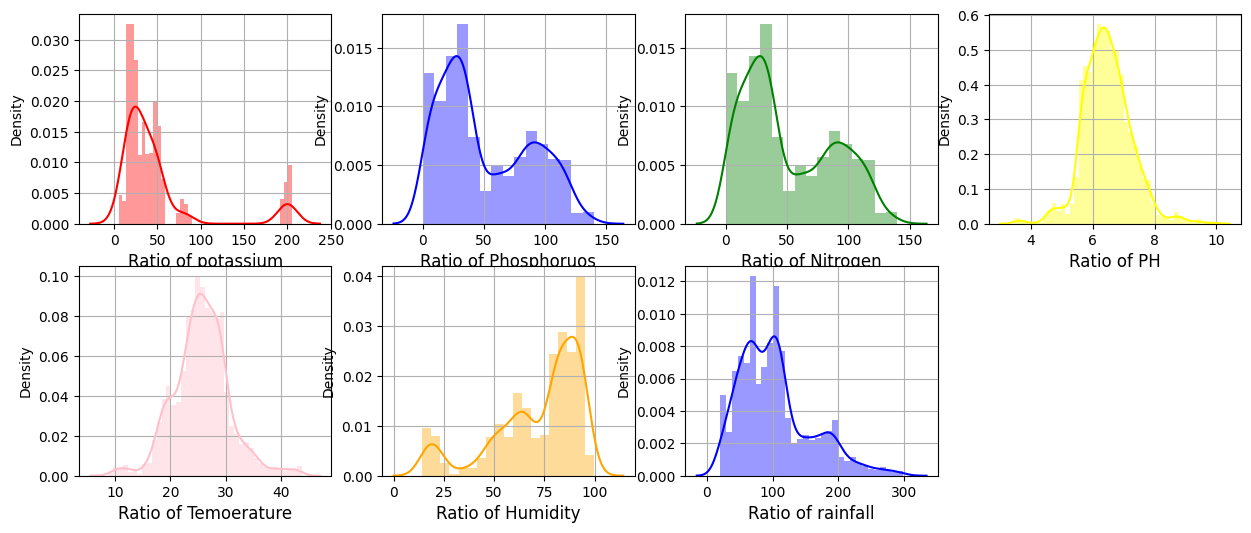

In [28]:
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(2,4,1)
sns.distplot(df['K'],color='red')
plt.xlabel('Ratio of potassium',fontsize=12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df['N'],color='blue')
plt.xlabel('Ratio of Phosphoruos',fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df['N'],color='green')
plt.xlabel('Ratio of Nitrogen',fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(df['ph'],color='yellow')
plt.xlabel('Ratio of PH',fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(df['temperature'],color='pink')
plt.xlabel('Ratio of Temoerature',fontsize=12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(df['humidity'],color='orange')
plt.xlabel('Ratio of Humidity',fontsize=12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(df['rainfall'],color='blue')
plt.xlabel('Ratio of rainfall',fontsize=12)
plt.grid()

plt.subtitle("Distribution for Agriculture Condition")
plt.show()


In [41]:
#let find out some interesting facts

print("Some Interesting Patterns :")
print("*****************************************************")
print("Crops which required very high Nitrogen content in soil:",df[df["N"]>120]['label'].unique())
print("Crops which required very high Phosphurous content in soil:",df[df["P"]>100]['label'].unique())
print("Crops which required very high Potassium content in soil:",df[df["K"]>200]['label'].unique())
print("Crops which required very high Rainfall content in soil:",df[df["rainfall"]>200]['label'].unique())
print("Crops which required very high Temperature content in soil:",df[df["temperature"]>40]['label'].unique())
print("Crops which required very high Temperature content in soil:",df[df["temperature"]<10]['label'].unique())
print("Crops which required very high Humidity content in soil:",df[df["humidity"]>20]['label'].unique())
print("Crops which required very high Ph content in soil:",df[df["ph"]<4]['label'].unique())
print("Crops which required very high Ph content in soil:",df[df["ph"]>9]['label'].unique())

Some Interesting Patterns :
*****************************************************
Crops which required very high Nitrogen content in soil: ['cotton']
Crops which required very high Phosphurous content in soil: ['grapes' 'apple']
Crops which required very high Potassium content in soil: ['grapes' 'apple']
Crops which required very high Rainfall content in soil: ['rice' 'papaya' 'coconut']
Crops which required very high Temperature content in soil: ['grapes' 'papaya']
Crops which required very high Temperature content in soil: ['grapes']
Crops which required very high Humidity content in soil: ['rice' 'maize' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon'
 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']
Crops which required very high Ph content in soil: ['mothbeans']
Crops which required very high Ph content in soil: ['mothbeans']


In [42]:
#let import the library so that we can avoid warnings

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

x=df.loc[:,["N" , "P" , "K" , "temperature" , "ph" , "humidity" , "rainfall"]].values

#let's chech the shape of x
print(x.shape)

#Let's cnvert these data into a DataFrame
x_df=pd.DataFrame(x)

x_df.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,6.502985,82.002744,202.935536
1,85.0,58.0,41.0,21.770462,7.038096,80.319644,226.655537
2,60.0,55.0,44.0,23.004459,7.840207,82.320763,263.964248
3,74.0,35.0,40.0,26.491096,6.980401,80.158363,242.864034
4,78.0,42.0,42.0,20.130175,7.628473,81.604873,262.717340


In [43]:
import sklearn.preprocessing as preprocessing
df_scaled=preprocessing.scale(x,axis=0)

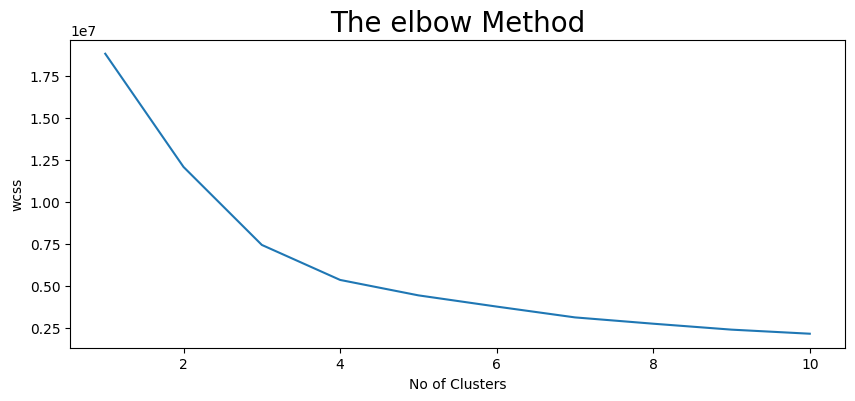

In [44]:
#Let's us determine the uptimum number of clusters within Data set
plt.rcParams['figure.figsize']=(10,4)
wcss=[ ]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++' ,max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The elbow Method',fontsize=20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

In [45]:
#Let's implement the k-means algorithm to perform clustering Analysis
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4,init= 'k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit(x)

#Let's find out the results
y_pre=y_means.predict(x)
y_pre=pd.DataFrame(y_pre)
y = df["label"]
z=pd.concat([y_pre,y],axis=1)
z=z.rename(columns={0:'Clusters'})

In [46]:
import sklearn.preprocessing as preprocessing
df_scaled=preprocessing.scale(x,axis=0)

In [47]:
print("Crops in first Cluster")
print("***************************************************************")
print(z[z['Clusters']==0]['label'].unique())
print("Crops in second Clusters")
print("***************************************************************")
print(z[z['Clusters']==1]['label'].unique())
print("Crops in third Clusters")
print("***************************************************************")
print(z[z['Clusters']==2]['label'].unique())
print("Crops in forth Clusters")
print("***************************************************************")
print(z[z['Clusters']==3]['label'].unique())

Crops in first Cluster
***************************************************************
['grapes' 'apple']
Crops in second Clusters
***************************************************************
['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Crops in third Clusters
***************************************************************
['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
Crops in forth Clusters
***************************************************************
['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [48]:
#Let's create Training and Testing Sets for validation of Results
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

print("The shape of x train",x_train.shape)
print("The shape of x test",x_test.shape)
print("The shape of y train",y_train.shape)
print("The shape of y test",y_test.shape)

The shape of x train (1760, 7)
The shape of x test (440, 7)
The shape of y train (1760,)
The shape of y test (440,)


# let's create a predictive Model

In [49]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(solver='liblinear')
log_model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [50]:
y_pred=log_model.predict(x_test)

In [51]:
h=log_model.predict(np.array([[100, 6,	97,	53,	20,	60,	52,]]))
h

array(['mango'], dtype=object)

In [52]:
# Let's get our classification refort in order to check precssion

from sklearn.metrics import classification_report
# Let's print the classification reportalso

cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      0.94      0.97        18
   blackgram       0.88      1.00      0.94        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.86      0.86        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      0.88      0.94        17
       maize       1.00      0.89      0.94        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.84      0.91        25
    mungbean       0.94      1.00      0.97        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       0.87    

In [34]:
print(df)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [54]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      0.94      0.97        18
   blackgram       0.88      1.00      0.94        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.86      0.86        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      0.88      0.94        17
       maize       1.00      0.89      0.94        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.84      0.91        25
    mungbean       0.94      1.00      0.97        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       0.87    

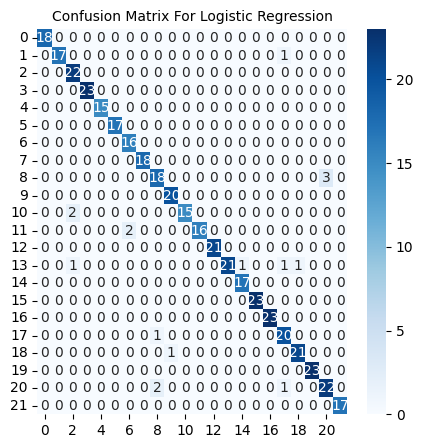

In [55]:
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize']=(5,5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.title('Confusion Matrix For Logistic Regression', fontsize = 10)
plt.show()

# Let's predict

In [56]:
predictions=log_model.predict(np.array([[9, 7, 65, 10, 25, 7,	102]]))
print("The suggest crop for such climate:",predictions)

The suggest crop for such climate: ['coffee']


In [57]:
predictions=log_model.predict(np.array([[90,42,43,20,82,7,202]]))
print("The suggest crop for such climate:",predictions)

The suggest crop for such climate: ['kidneybeans']


In [58]:
predictions=log_model.predict(np.array([[90,5,30,70,75,40,68]]))
print("The suggest crop for such climate:",predictions)

The suggest crop for such climate: ['coffee']


In [59]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)*100

96.13636363636363